In [7]:
# IMport Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

import os


import PIL
import tensorflow as tf
import matplotlib.image as image
import pickle 

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [6]:
dir_path = 'CNN letter Dataset'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes (letters and digits): ', NUM_CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of classes (letters and digits):  35


In [3]:
digits_counter = {}
NUM_IMAGES = 0

for digit in digits:
    path = os.path.join(dir_path, digit)
    digits_counter[digit] = len(os.listdir(path))
    NUM_IMAGES += len(os.listdir(path))

print(digits_counter)
print('Number of all images: ', NUM_IMAGES)

{'0': 1030, '1': 1030, '2': 1030, '3': 1030, '4': 1030, '5': 1030, '6': 1030, '7': 1030, '8': 1030, '9': 1030, 'A': 1010, 'B': 1030, 'C': 1020, 'D': 1010, 'E': 1010, 'F': 1020, 'G': 1020, 'H': 1020, 'I': 1010, 'J': 1030, 'K': 1010, 'L': 1010, 'M': 1020, 'N': 1020, 'P': 1010, 'Q': 1010, 'R': 1020, 'S': 1020, 'T': 1020, 'U': 1010, 'V': 1030, 'W': 1010, 'X': 1010, 'Y': 1010, 'Z': 810}
Number of all images:  35500


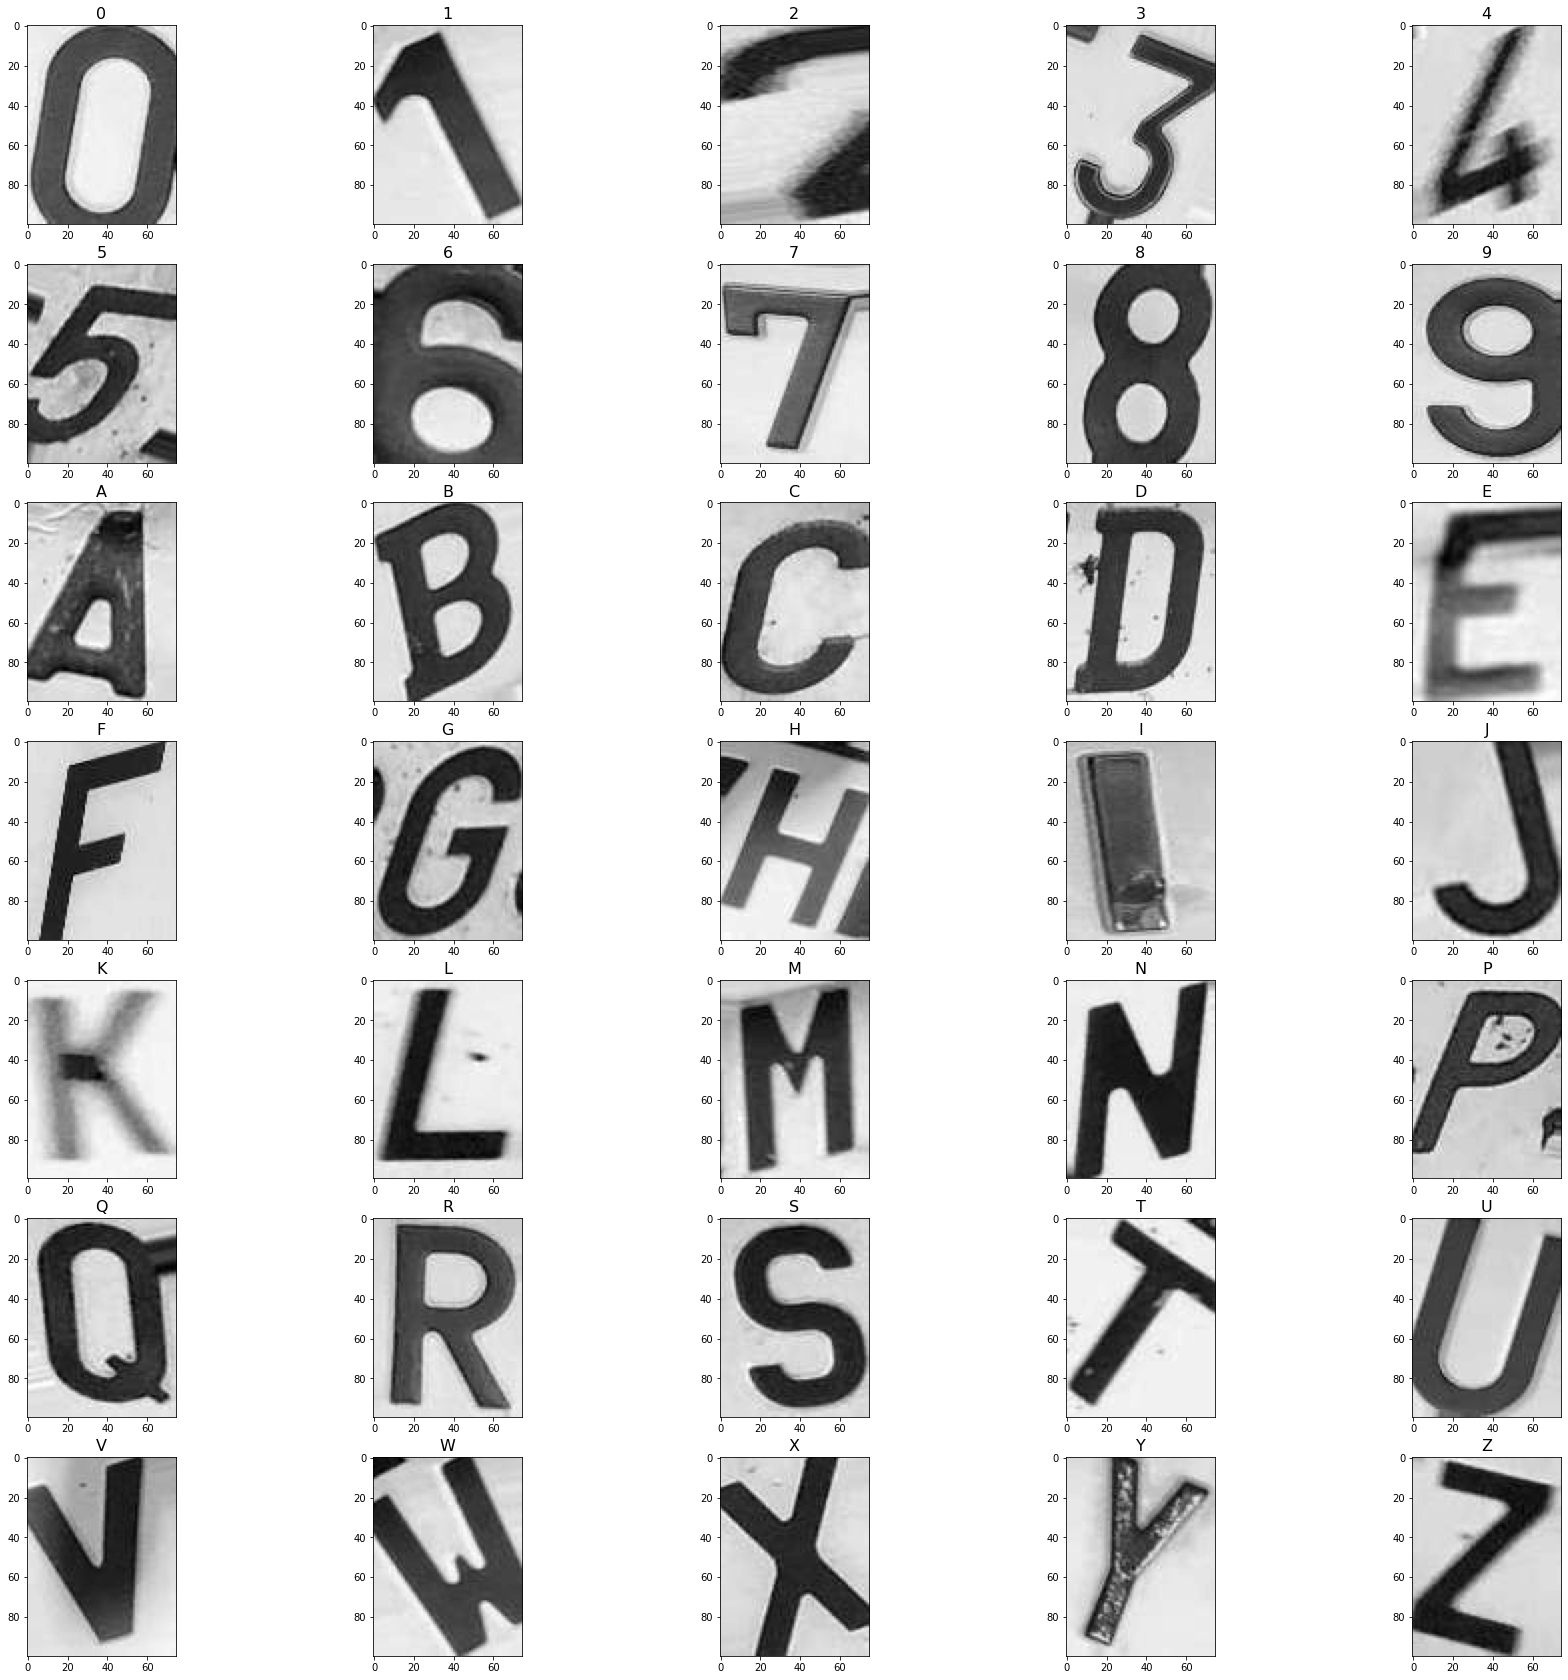

In [4]:
rows, columns = 7, 5

k = 0
fig, axes = plt.subplots(rows, columns, figsize=(30, 30))
for row in range(rows):
    for column in range(columns):
        rand_num = np.random.randint(0, digits_counter[digits[k]])
        class_path = dir_path + '/' + str(digits[k])
        image_path = class_path + '/' + str(os.listdir(class_path)[rand_num])
        ax = axes[row, column]
        ax.set_title(digits[k], loc='center', fontsize=16)
        ax.imshow(imread(image_path), cmap='gray')
        k += 1
plt.show()

# Loading data into numpy arrays

In [5]:
data = []
labels = []
MAX_NUM = None   # maximum number of digits images per class
IMG_WIDTH, IMG_HEIGHT = 32, 40

# images of digits '6' in folder with '2'
incorrect_img = [
    'aug20121_0.jpg',
    'aug20122_1.jpg',
    'aug20123_2.jpg',
    'aug20124_3.jpg',
    'aug20125_4.jpg',
    'aug20126_5.jpg',
    'aug20127_6.jpg',
    'aug20128_7.jpg',
    'aug20129_8.jpg',
    'aug20130_9.jpg'
]

for digit in digits:
    path = os.path.join(dir_path, digit)
    label = digits.index(digit)
    for img in os.listdir(path):
        if img in incorrect_img:
            continue
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        resized = cv.resize(img_array, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv.INTER_AREA)
        gray = cv.cvtColor(resized, cv.COLOR_RGB2GRAY)        
        data.append(gray)
        labels.append(label)
        if MAX_NUM is not None:
            if labels.count(label) == MAX_NUM:
                break

data = np.array(data, dtype='float32')
labels = np.array(labels, dtype='int8')

In [6]:
print(data.shape)

(35490, 40, 32)


In [7]:
data = data / 255.0
data = data.reshape(*data.shape, 1)
labels = to_categorical(labels, num_classes=NUM_CLASSES)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size=.3)

print("Training dataset shape: ", X_train.shape, y_train.shape)
print("Validation dataset shape: ", X_val.shape, y_val.shape)
print("Testing dataset shape: ", X_test.shape, y_test.shape)

Training dataset shape:  (17390, 40, 32, 1) (17390, 35)
Validation dataset shape:  (7453, 40, 32, 1) (7453, 35)
Testing dataset shape:  (10647, 40, 32, 1) (10647, 35)


# Training Neural Network

In [9]:
model = tf.keras.Sequential([
    Flatten(input_shape=(40, 32, 1)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(35,activation='softmax')
])

2022-01-07 05:52:38.999164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:52:39.098967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:52:39.099667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:52:39.100923: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                    epochs=15, batch_size=256,
                    validation_data=(X_val, y_val))

2022-01-07 05:52:41.492741: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
68/68 [==============================] - 2s 8ms/step - loss: 3.0876 - accuracy: 0.1970 - val_loss: 3.3067 - val_accuracy: 0.2416
Epoch 2/15
68/68 [==============================] - 0s 5ms/step - loss: 2.1102 - accuracy: 0.5264 - val_loss: 2.8790 - val_accuracy: 0.4896
Epoch 3/15
68/68 [==============================] - 0s 5ms/step - loss: 1.5260 - accuracy: 0.7162 - val_loss: 2.2116 - val_accuracy: 0.7045
Epoch 4/15
68/68 [==============================] - 0s 6ms/step - loss: 1.1365 - accuracy: 0.8163 - val_loss: 1.5292 - val_accuracy: 0.8152
Epoch 5/15
68/68 [==============================] - 0s 5ms/step - loss: 0.8684 - accuracy: 0.8676 - val_loss: 1.0522 - val_accuracy: 0.8605
Epoch 6/15
68/68 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.8974 - val_loss: 0.7706 - val_accuracy: 0.8877
Epoch 7/15
68/68 [==============================] - 0s 5ms/step - loss: 0.5553 - accuracy: 0.9178 - val_loss: 0.5846 - val_accuracy: 0.9078
Epoch 8/15
68/68 [==

# Training Curve for NN

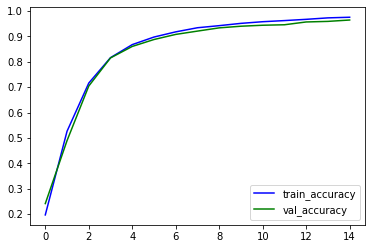

In [12]:
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [13]:
model.evaluate(X_val,y_val)

233/233 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9644


[0.20498201251029968, 0.9644438624382019]

In [14]:
model.evaluate(X_test,y_test)

333/333 [==============================] - 1s 2ms/step - loss: 0.2048 - accuracy: 0.9633


[0.20477816462516785, 0.9632760286331177]

# Convolution Neural Nets

In [15]:
input_layer=Input(shape=(40,32,1))
layer=Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Flatten()(layer)

layer=Dense(64,activation="relu")(layer)
layer=BatchNormalization()(layer)

layer=Dense(32,activation="relu")(layer)
output_layer=Dense(35,activation="softmax")(layer)
model2=Model(inputs=input_layer,outputs=output_layer)
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 30, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 29, 16)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 37, 29, 16)        64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 17168)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1098816   
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256   

In [16]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [17]:
history2 = model2.fit(X_train, y_train,
                    epochs=15, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/15


2022-01-07 05:52:51.855893: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


68/68 [==============================] - 6s 11ms/step - loss: 2.4528 - accuracy: 0.4298 - val_loss: 3.3421 - val_accuracy: 0.1971
Epoch 2/15
68/68 [==============================] - 1s 9ms/step - loss: 1.5570 - accuracy: 0.7850 - val_loss: 3.1770 - val_accuracy: 0.2434
Epoch 3/15
68/68 [==============================] - 1s 8ms/step - loss: 1.1189 - accuracy: 0.8961 - val_loss: 2.9904 - val_accuracy: 0.2991
Epoch 4/15
68/68 [==============================] - 0s 7ms/step - loss: 0.8411 - accuracy: 0.9449 - val_loss: 2.7288 - val_accuracy: 0.4663
Epoch 5/15
68/68 [==============================] - 0s 7ms/step - loss: 0.6451 - accuracy: 0.9652 - val_loss: 2.3704 - val_accuracy: 0.6566
Epoch 6/15
68/68 [==============================] - 0s 7ms/step - loss: 0.5012 - accuracy: 0.9784 - val_loss: 1.9499 - val_accuracy: 0.8119
Epoch 7/15
68/68 [==============================] - 1s 10ms/step - loss: 0.3953 - accuracy: 0.9867 - val_loss: 1.4495 - val_accuracy: 0.9224
Epoch 8/15
68/68 [===========

# Training curve for CNN

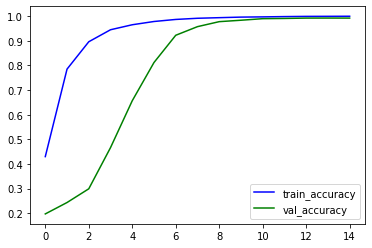

In [18]:
hist=history2.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [19]:
model2.evaluate(X_val,y_val)

233/233 [==============================] - 1s 2ms/step - loss: 0.1268 - accuracy: 0.9922


[0.12678618729114532, 0.9922178983688354]

In [20]:
model2.evaluate(X_test,y_test)

333/333 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9930


[0.1255478709936142, 0.993049681186676]